<a href="https://colab.research.google.com/github/BraulioHermanson/Machine-Learning-Project/blob/main/Projeto_Rio_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas

- 1.Entendimento do Desafio
- 2.Entendimento da Área de Negócio
- 3.Extração e Obtenção de Dados
- 4.Ajuste/Limpeza dos Dados
- 5.EDA (Análise Exploratória)
- 6.Modelagem e Algoritimos
- 7.Interpretação dos Resultado
- 8.Deploy

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

Elas estão disponíveis para download abaixo da aula (se você puxar os dados direto do Kaggle pode ser que encontre resultados diferentes dos meus, afinal as bases de dados podem ter sido atualizadas).

Caso queira uma outra solução, podemos olhar como referência a solução do usuário Allan Bruno do kaggle no Notebook: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb

Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

## Importando Bibliotecas e Bases de Dados

In [61]:
#percorrer arquivos das pastas
import pathlib
#tratando e visualizando os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#mapas
import plotly.express as px
#ML
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
#Deploy
import joblib

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
cor_marr_la= '#C8AA16'
cor_azul_r = '#818DC9'
cor_ve_laranj = '#B0AD2B'
cor_amar_claro = '#FAE27C'
cor_creme = '#FEF0C8'
cor_verde_claro ='#B9F0C6'

In [5]:
meses = {'jan':1,'fev':2,'mar':3,'abr':4,'mai':5,'jun':6,'jul':7,'ago':8,'set':9,'out':10,'nov':11,'dez':12}

caminho_bases = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/#treinamentos/dataset')

base = pd.DataFrame()
for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv',''))
    df = pd.read_csv(caminho_bases/arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    base = base.append(df)
    
display(base)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,ano,mes
0,17878,https://www.airbnb.com/rooms/17878,20190923212307,2019-09-24,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.13,2019,9
1,25026,https://www.airbnb.com/rooms/25026,20190923212307,2019-09-24,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3.0,0.0,0.0,2.06,2019,9
2,31560,https://www.airbnb.com/rooms/31560,20190923212307,2019-09-24,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.36,2019,9
3,35636,https://www.airbnb.com/rooms/35636,20190923212307,2019-09-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1.0,0.0,0.0,2.25,2019,9
4,35764,https://www.airbnb.com/rooms/35764,20190923212307,2019-09-24,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,strict_14_with_grace_period,f,t,1,1.0,0.0,0.0,2.83,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37240,356406,https://www.airbnb.com/rooms/356406,20180914022056,2018-09-14,Luxurious apartment in Copacabana,NaN,Apartment between Copacabana and Ipanema. I ha...,Apartment between Copacabana and Ipanema. I ha...,none,NaN,...,strict_14_with_grace_period,f,f,4,NaN,NaN,NaN,0.07,2018,9
37241,10677877,https://www.airbnb.com/rooms/10677877,20180914022056,2018-09-14,604 Studio Copacabana,"Apartamento todo reformado. Possui wi fi, TV a...",NaN,"Apartamento todo reformado. Possui wi fi, TV a...",none,NaN,...,strict_14_with_grace_period,f,f,4,NaN,NaN,NaN,NaN,2018,9
37242,27831574,https://www.airbnb.com/rooms/27831574,20180914022056,2018-09-14,2 BRs & 2 WC's,NaN,NaN,NaN,none,NaN,...,strict_14_with_grace_period,f,f,1,NaN,NaN,NaN,NaN,2018,9
37243,2066453,https://www.airbnb.com/rooms/2066453,20180914022056,2018-09-14,Charming Studio in Copacabana,Well located within a short stroll from the be...,Bedroom divided by sliding door from dining ro...,Well located within a short stroll from the be...,none,NaN,...,moderate,f,f,1,NaN,NaN,NaN,0.06,2018,9


- Como temos muitas colunas, o modelo pode ficar muito devagar para rodar.
- E numa análise rápida conseguimos observar que algumas colunas são irrelevantes para o modelo, por isso vamos excluir alguns valores da base.
- Para isso criei um arquivo em excel para fazer uma pré-análise

In [6]:
print(base.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [7]:
#base.head(1000).to_csv('primeiros_dados.csv',sep=';)

### Análise qualitativa das colunas

- Depois da análise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos com as seguintes colunas:

In [8]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base = base.loc[:, colunas]
print(list(base.columns))
display(base)

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,within an hour,100%,t,2.0,-22.965920,-43.178960,Condominium,Entire home/apt,5,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2019,9
1,within a few hours,100%,f,3.0,-22.977120,-43.190450,Apartment,Entire home/apt,3,1.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
2,within an hour,100%,t,1.0,-22.983020,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2019,9
3,within a few hours,100%,t,1.0,-22.988160,-43.193590,Apartment,Entire home/apt,3,1.5,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
4,within an hour,100%,t,1.0,-22.981270,-43.190460,Loft,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37240,within a day,100%,f,4.0,-22.983058,-43.192096,Apartment,Entire home/apt,6,2.0,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2018,9
37241,within a day,67%,f,4.0,-22.983713,-43.192103,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2018,9
37242,within an hour,100%,f,1.0,-22.982379,-43.192925,Apartment,Entire home/apt,1,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2018,9
37243,within a day,50%,f,1.0,-22.976690,-43.193082,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2018,9


### Tratando valores faltantes

- Visualizando os dados, percebemos uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise
- Para as outras colunas, como temos muitos dados (mais de 900.000 linhas) vamos excluir as linhas que contém dados NaN

In [9]:
base.isnull().sum()

for coluna in base:
  if base[coluna].isnull().sum() > 300000:
    base = base.drop(coluna,axis=1)
print(base.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [10]:
base = base.dropna()
print('Dim of dataset',
  '\nVariables: ',base.shape[1], '\n'
  'Rows: ',base.shape[0])
print(base.isnull().sum())

Dim of dataset 
Variables:  23 
Rows:  897709
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Validando os Tipos de Dados em cada coluna

- Validando se o Python está lendo como texto alguma coluna que deveria ser um número, então precisamos corrigir

In [11]:
print(base.dtypes)
print('-'*60)
print(base.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           t
host_listings_count

- Como o preço e extra people estão sendo reconhecidos como objeto (ao invés de ser um float) temos que mudar o tipo de variável da coluna.

In [12]:
#coluna price
base['price'] = base['price'].str.replace('$', '')
base['price'] = base['price'].str.replace(',', '')
base['price'] = base['price'].astype(np.float32, copy=False)

#coluna extra people
base['extra_people'] = base['extra_people'].str.replace('$', '')
base['extra_people'] = base['extra_people'].str.replace(',', '')
base['extra_people'] = base['extra_people'].astype(np.float32, copy=False)
#verificando os tipos
print(base.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

- Avaliar feature por feature para:
    1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
    2. Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1
    3. Confirmar se todas as features que temos fazem realmente sentido para o  modelo ou se alguma delas não vai nos ajudar e se temos que exclui-las.
    
- Começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.

- Depois analisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)

- Por fim, avaliar as colunas de texto e definir quais categorias fazem sentido manter ou não.

Opção de análise: Se o objetivo é ajudar a precificar um imóvel que você está querendo disponibilizar, excluir outliers em host_listings_count pode fazer sentido. Agora, se você é uma empresa com uma série de propriedades e quer comparar com outras empresas do tipo também e se posicionar dessa forma, talvez excluir quem tem acima de 6 propriedades tire isso do seu modelo. Pense sempre no seu objetivo.

In [13]:
corr = (base.corr()).round(2)
#display(corr)

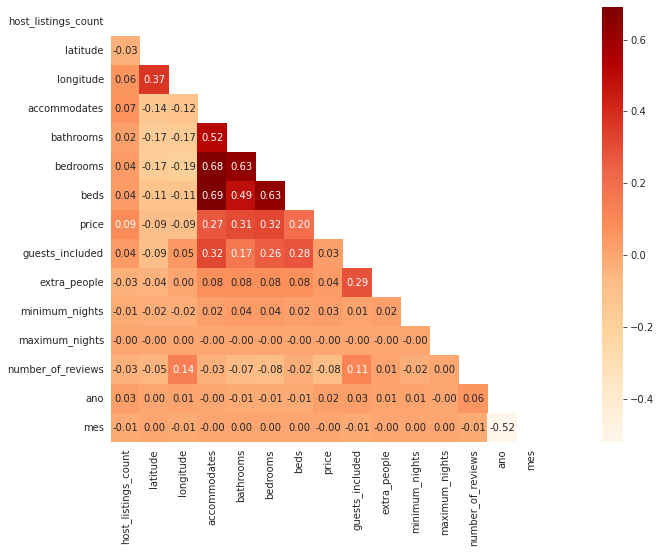

In [14]:
# heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 8))
    ax = sns.heatmap(corr,mask=mask, cmap='OrRd', fmt='.2f',square=True, linecolor='white', annot=True);


### Definição de Funções para Análise de Outliers


In [15]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [16]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1,color= cor_marr_la)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2,color= cor_marr_la)
    sns.despine()
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True,color=  cor_marr_la)
    sns.despine()

def grafico_barra(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts(),color= cor_ve_laranj)
    ax.set_xlim(limites(coluna))
    sns.despine()

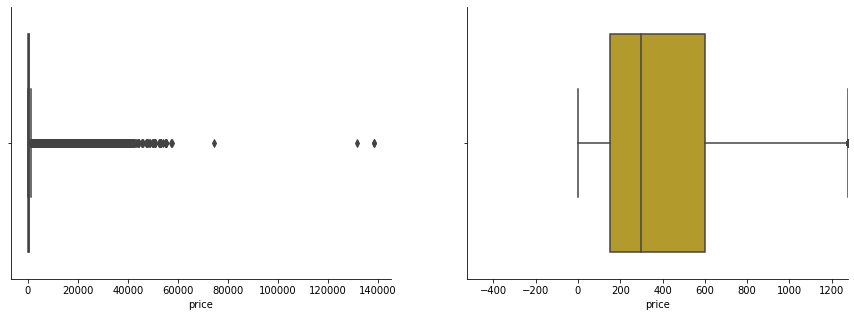

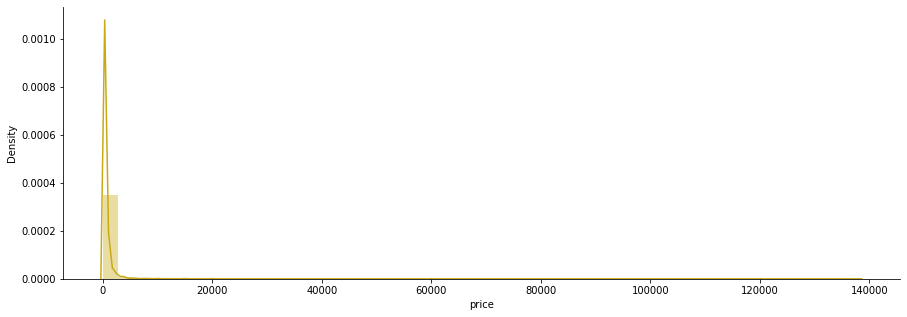

In [17]:
diagrama_caixa(base['price'])
histograma(base['price'])

Como estamos construindo um modelo focado em imóveis comuns, acredito que os valores acima do limite superior serão apenas de apartamentos de altíssimo luxo, que não é o objetivo principal. Por isso, podemos excluir esses outliers.

In [18]:
base, linhas_removidas = excluir_outliers(base, 'price')
print('{} linhas removidas'.format(linhas_removidas))

87282 linhas removidas


(810427, 23)


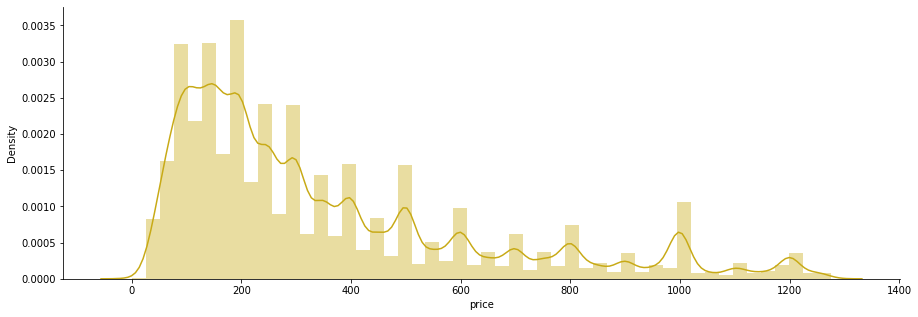

In [19]:
histograma(base['price'])
print(base.shape)

### extra_people

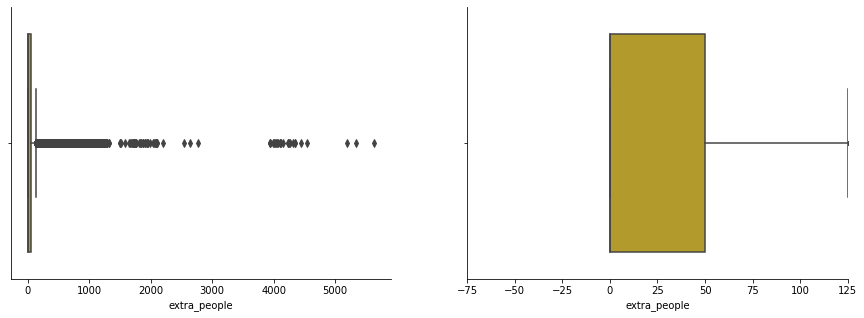

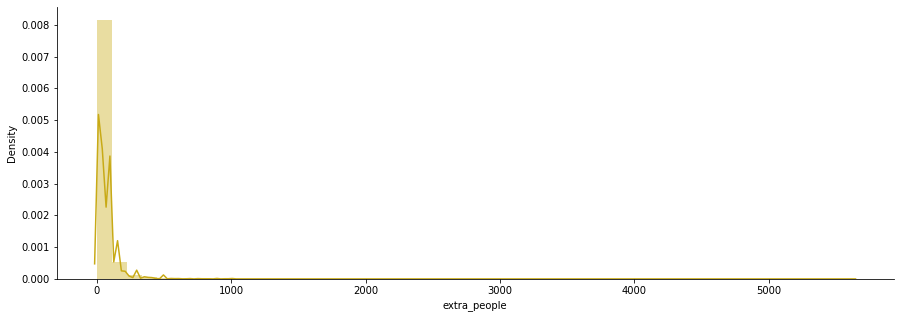

In [20]:
diagrama_caixa(base['extra_people'])
histograma(base['extra_people'])

In [21]:
base, linhas_removidas = excluir_outliers(base, 'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

59194 linhas removidas


(751233, 23)


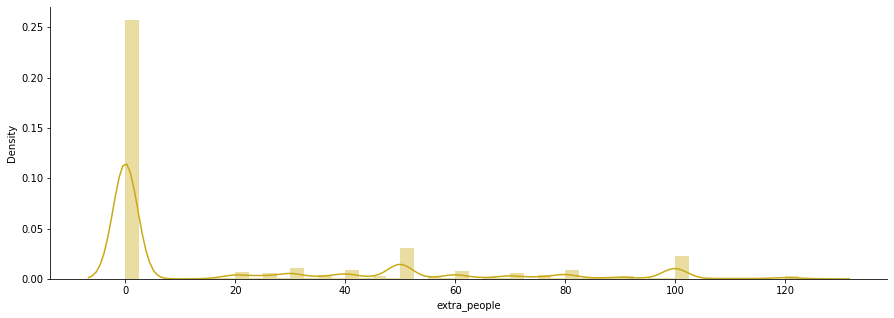

In [22]:
histograma(base['extra_people'])
print(base.shape)

### host_listings_count

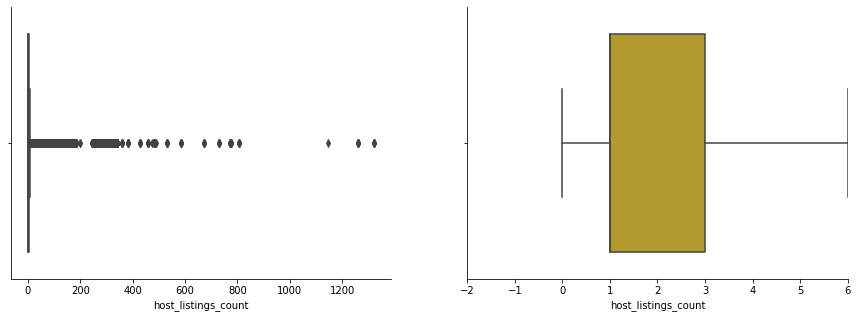

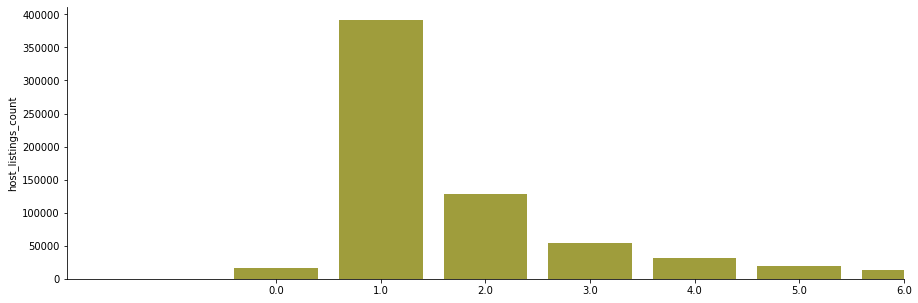

In [23]:
diagrama_caixa(base['host_listings_count'])
grafico_barra(base['host_listings_count'])

Podemos excluir os outliers, porque para o objetivo do nosso projeto porque hosts com mais de 6 imóveis no airbnb não é o público alvo do objetivo do projeto (imagino que sejam imobiliários ou profissionais que gerenciam imóveis no airbnb)

In [24]:
base, linhas_removidas = excluir_outliers(base, 'host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))

97723 linhas removidas


### accommodates

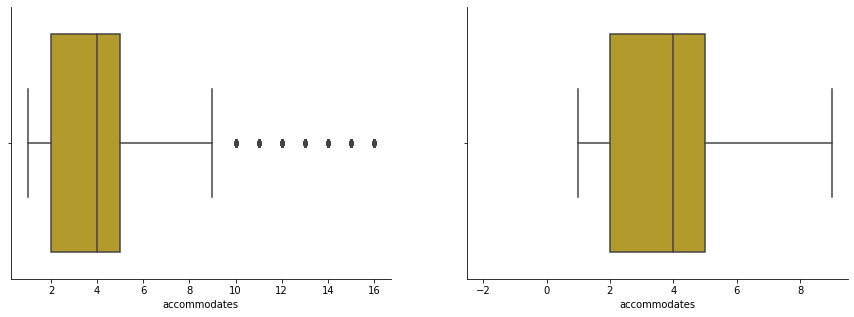

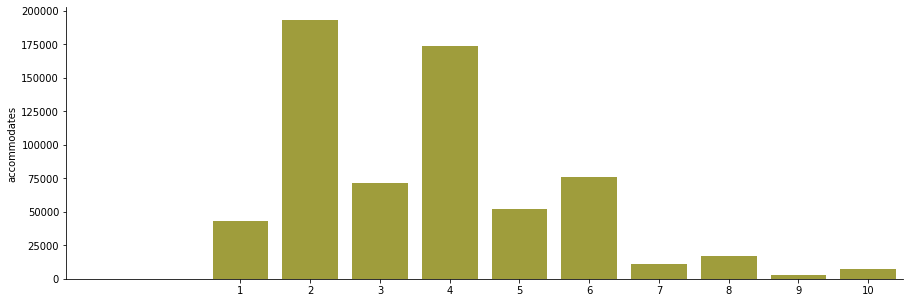

In [25]:
diagrama_caixa(base['accommodates'])
grafico_barra(base['accommodates'])

- Pelo mesmo motivo do "host_listings_count" vamos excluir os outliers dessa coluna porque apartamentos que acomodam mais de 9 pessoas não são o nosso foco, nosso objetivo aqui é para imóveis comuns.

- Caso a gente quisesse incluir apartamentos de alto padrão a gente poderia manter essa variável ou então construir um modelo só focado em imóvei com mais de 9 hóspedes

In [26]:
base, linhas_removidas = excluir_outliers(base, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

13146 linhas removidas


### bathrooms

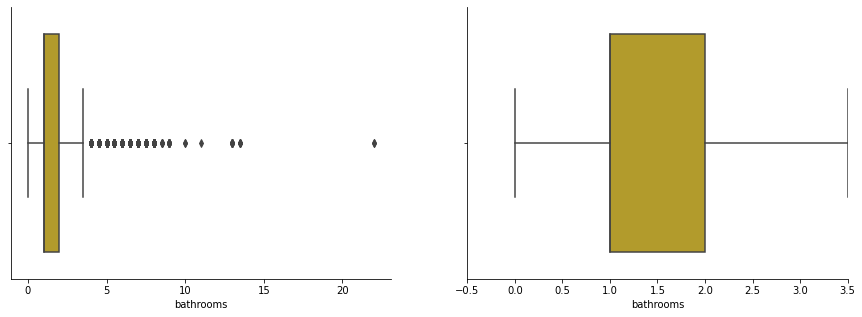

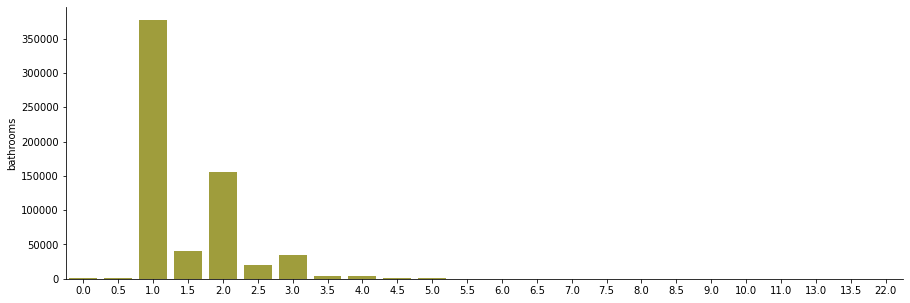

In [27]:
diagrama_caixa(base['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base['bathrooms'].value_counts().index, y=base['bathrooms'].value_counts(),color= cor_ve_laranj)
sns.despine()

In [28]:
base, linhas_removidas = excluir_outliers(base, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

6894 linhas removidas


### Bedrooms

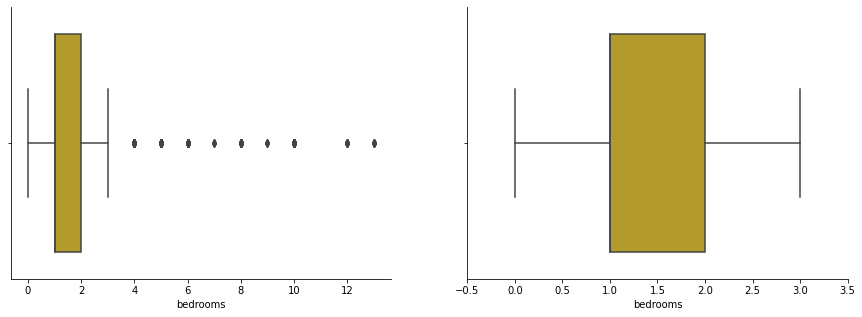

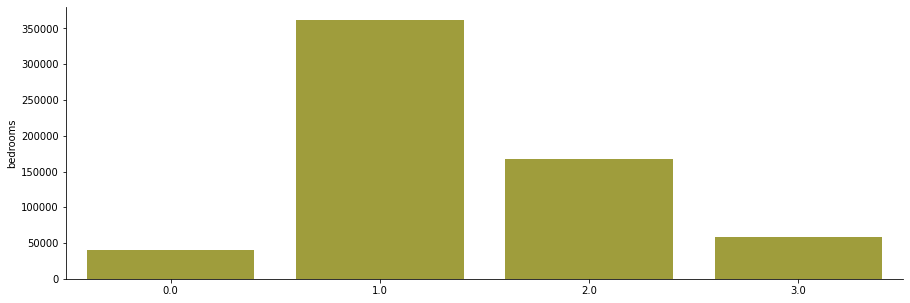

In [29]:
diagrama_caixa(base['bedrooms'])
grafico_barra(base['bedrooms'])

In [30]:
base, linhas_removidas = excluir_outliers(base, 'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

5482 linhas removidas


### Bed

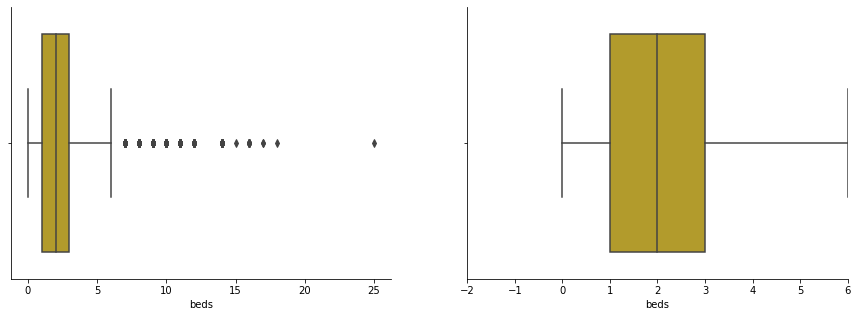

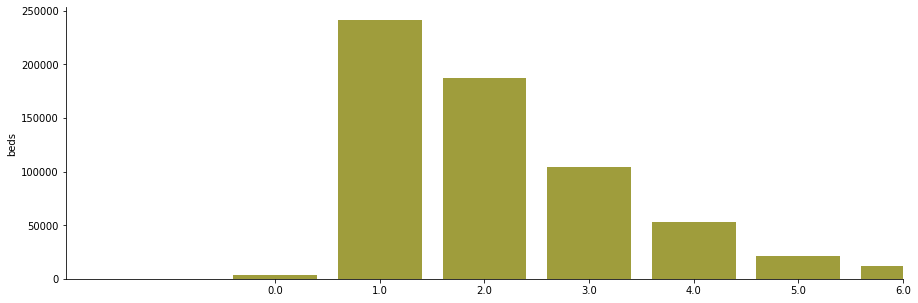

In [31]:
diagrama_caixa(base['beds'])
grafico_barra(base['beds'])

In [32]:
base, linhas_removidas = excluir_outliers(base, 'beds')
print('{} linhas removidas'.format(linhas_removidas))

5622 linhas removidas


### guests_included

(1.0, 1.0)


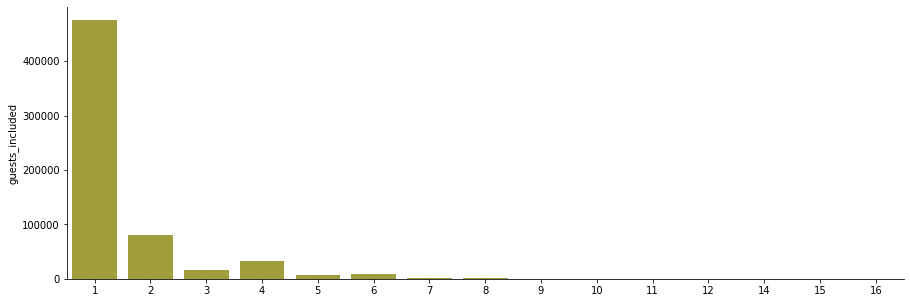

In [33]:
print(limites(base['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base['guests_included'].value_counts().index, y=base['guests_included'].value_counts(),color= cor_ve_laranj)
sns.despine()

Remover essa feature da análise. Parece que os usuários do airbnb usam muito o valor padrão do airbnb como 1 guest included. Isso pode levar o nosso modelo a considerar uma feature que na verdade não é essencial para a definição do preço, por isso, me parece melhor excluir a coluna da análise

In [34]:
base = base.drop('guests_included', axis=1)
base.shape

(622366, 22)

### minimum_nights

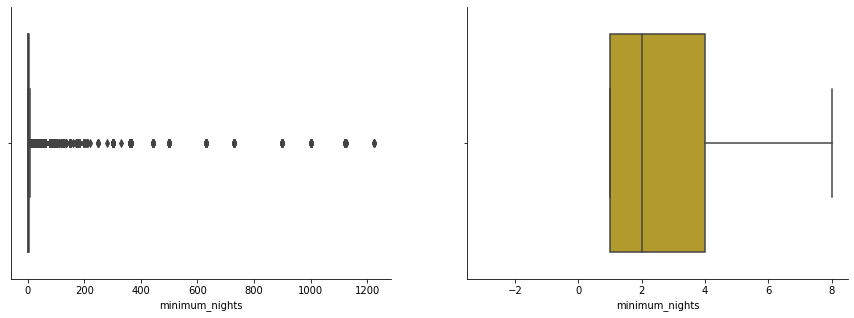

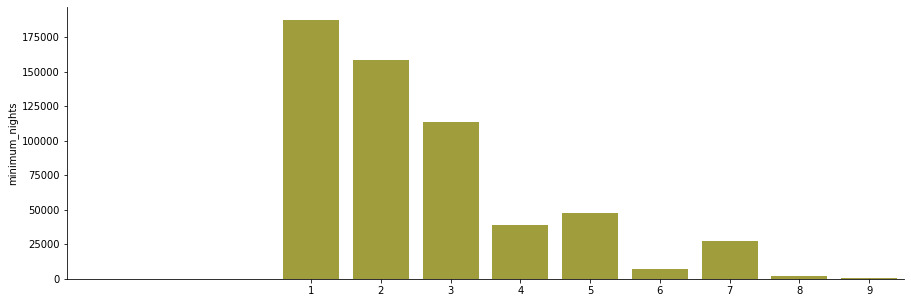

In [35]:
diagrama_caixa(base['minimum_nights'])
grafico_barra(base['minimum_nights'])

- Aqui temos um motivo talvez até mais forte para excluir esses apartamentos da análise.

- Estamos querendo um modelo que ajude a precificar apartamentos comuns como uma pessoa comum gostaria de disponibilizar. No caso, apartamentos com mais de 8 noites como o "mínimo de noites" podem ser apartamentos de temporada ou ainda apartamentos para morar, em que o host exige pelo menos 1 mês no apartamento.

- Por isso, vamos excluir os outliers dessa coluna

In [36]:
base, linhas_removidas = excluir_outliers(base, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

40383 linhas removidas


### maximum_nights

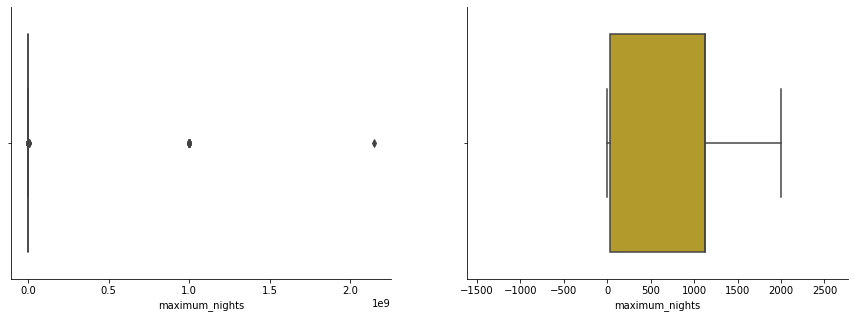

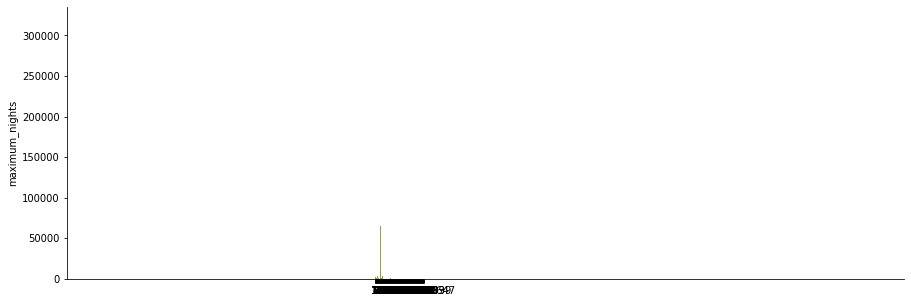

In [37]:
diagrama_caixa(base['maximum_nights'])
grafico_barra(base['maximum_nights'])

- Essa coluna não parece que vai ajudar na análise.

- Isso porque parece que quase todos os hosts não preenchem esse campo de maximum nights, então ele não parece que vai ser um fator relevante.

- É melhor excluirmos essa coluna da análise

In [38]:
base = base.drop('maximum_nights', axis=1)
base.shape

(581983, 21)

### number_of_reviews

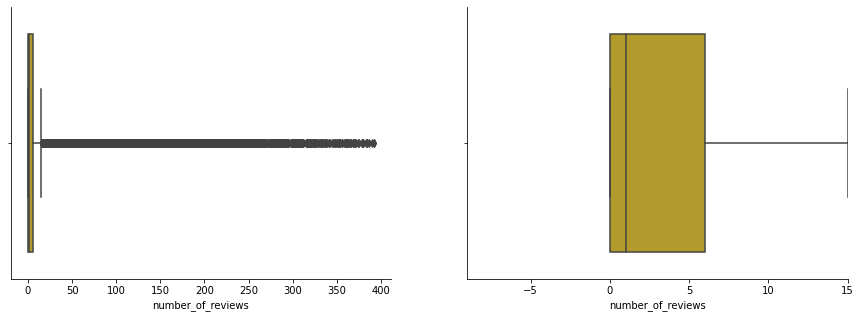

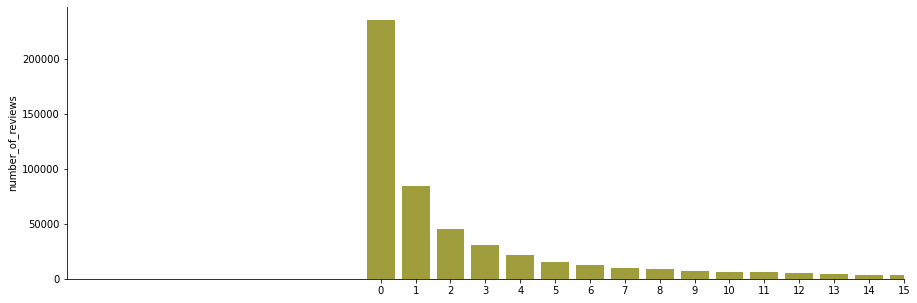

In [39]:
diagrama_caixa(base['number_of_reviews'])
grafico_barra(base['number_of_reviews'])

- Aqui poderíamos tomar algumas decisões diferentes. Eu vou tomar uma decisão baseado na minha análise pessoal de tirar essa característica da análise, por alguns motivos:

    1. Se excluirmos os outliers, vamos excluir as pessoas que tem a maior quantidade de reviews (o que normalmente são os hosts que têm mais aluguel). Isso pode impactar muito negativamente o nosso modelo
    2. Pensando no nosso objetivo, se eu tenho um imóvel parado e quero colocar meu imóvel lá, é claro que eu não tenho review nenhuma. Então talvez tirar essa característica da análise pode na verdade acabar ajudando.
    3. Particularmente tenho dúvida se essa característica deveria impactar ou não o preço final

In [40]:
base = base.drop('number_of_reviews', axis=1)
base.shape

(581983, 20)

## Tratamento de Colunas de Valores de Texto

### property_type

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

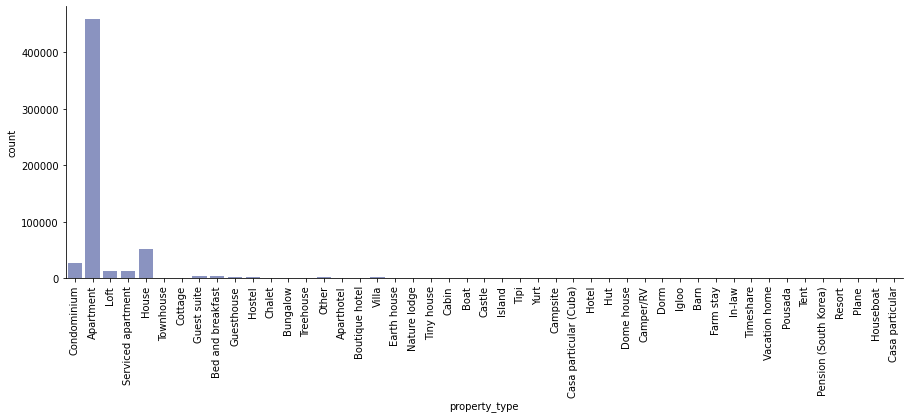

In [41]:
print(base['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base, color = cor_azul_r)
grafico.tick_params(axis='x', rotation=90)
sns.despine()

Aqui a nossa ação não é "excluir outliers", mas sim agrupar valores que são muito pequenos.

Todos os tipos de propriedade que têm menos de 2.000 propriedades na base de dados, eu vou agrupar em um grupo chamado "outros". Acho que isso vai facilitar o nosso modelo

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'In-law', 'Igloo', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


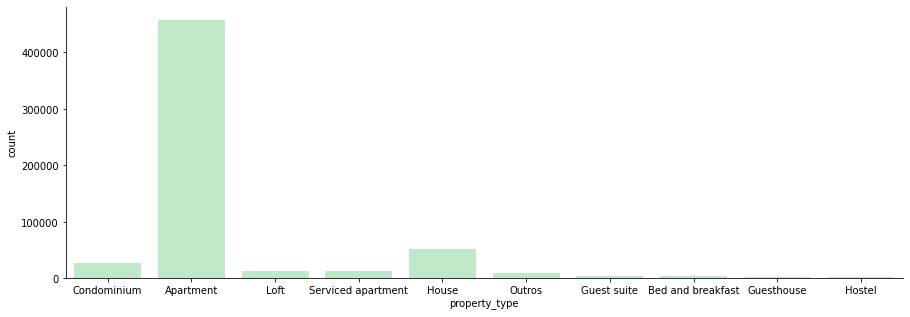

In [42]:
tabela_tipos_casa = base['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base.loc[base['property_type']==tipo, 'property_type'] = 'Outros'

print(base['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base, color = cor_verde_claro)
grafico.tick_params(axis='x', rotation=0)
sns.despine()

### room_type

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


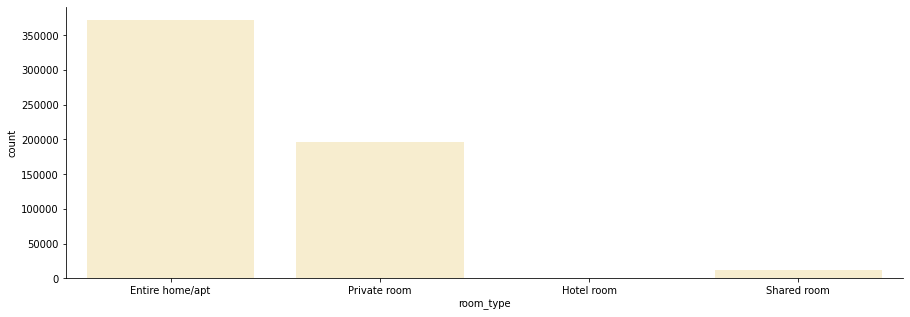

In [43]:
print(base['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('room_type', data=base,color= cor_creme)
grafico.tick_params(axis='x', rotation=0)
sns.despine()

Em tipo de quarto, não precisamos fazer nada, ele já parece estar bem distribuído

### bed_type

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64
['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64


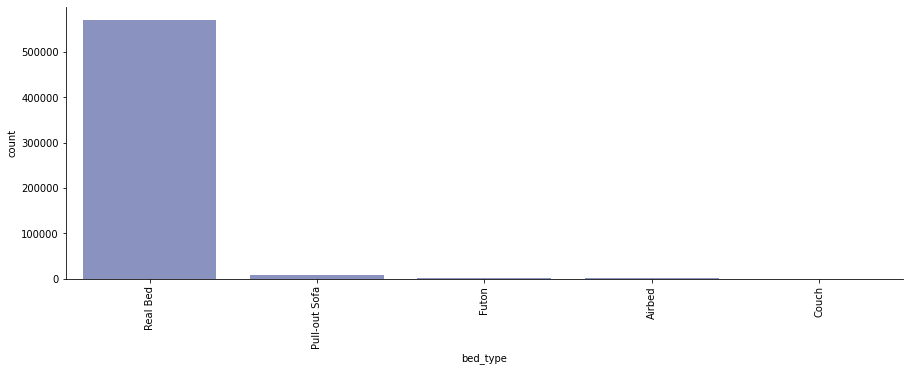

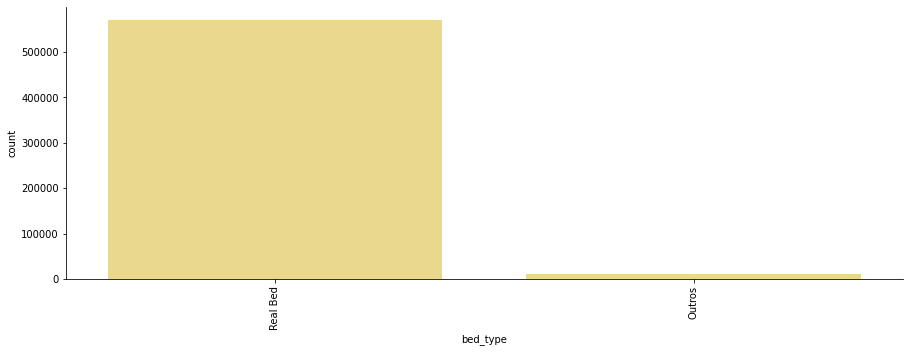

In [44]:
print(base['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base,color = cor_azul_r)
grafico.tick_params(axis='x', rotation=90)
sns.despine()

# agrupando categorias de bed_type
tabela_bed = base['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed.index:
    if tabela_bed[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base.loc[base['bed_type']==tipo, 'bed_type'] = 'Outros'

print(base['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base,color = cor_amar_claro)
grafico.tick_params(axis='x', rotation=90)
sns.despine()

- Aqui a nossa ação não é "excluir outliers", mas sim agrupar valores que são muito pequenos.

- Como temos 1 valor claramente MUITO maior do que todos os outros, vou criar apenas 2 grupos de camas: "Real Bed" e "outros"

Isso vai simplificar o modelo

### cancellation_policy

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64


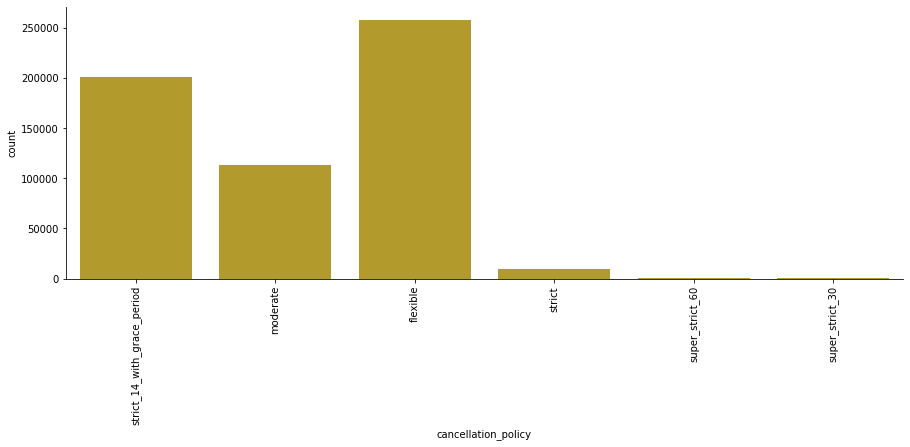

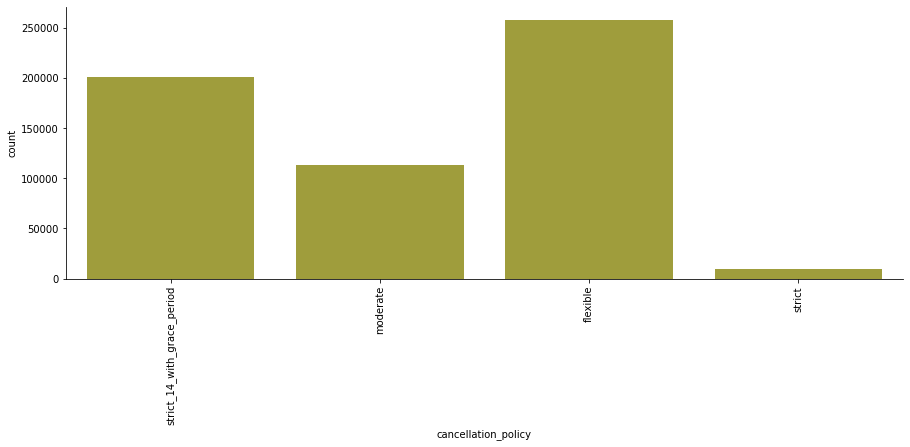

In [45]:
print(base['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base,color = cor_marr_la)
grafico.tick_params(axis='x', rotation=90)
sns.despine()

# agrupando categorias de cancellation_pollicy
tabela_cancellation = base['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base.loc[base['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'

print(base['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base,color = cor_ve_laranj)
grafico.tick_params(axis='x', rotation=90)
sns.despine()

### amenities

Como temos uma diversidade muito grande de amenities e, às vezes, as mesmas amenities podem ser escritas de forma diferente, vamos avaliar a quantidade de amenities como o parâmetro para o nosso modelo.

In [46]:
print(base['amenities'].iloc[1].split(','))
print(len(base['amenities'].iloc[1].split(',')))

base['n_amenities'] = base['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


In [47]:
base = base.drop('amenities', axis=1)
base.shape

(581983, 20)

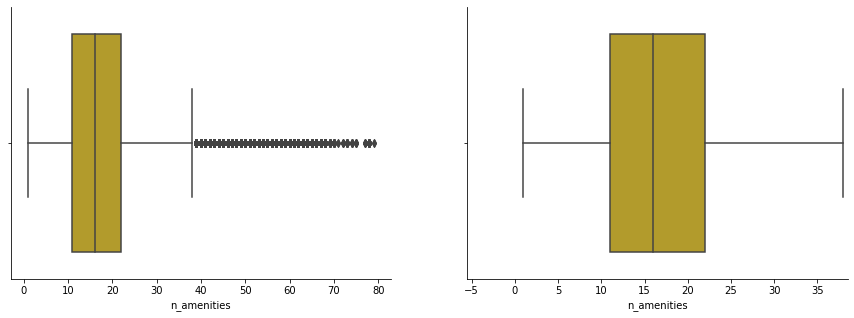

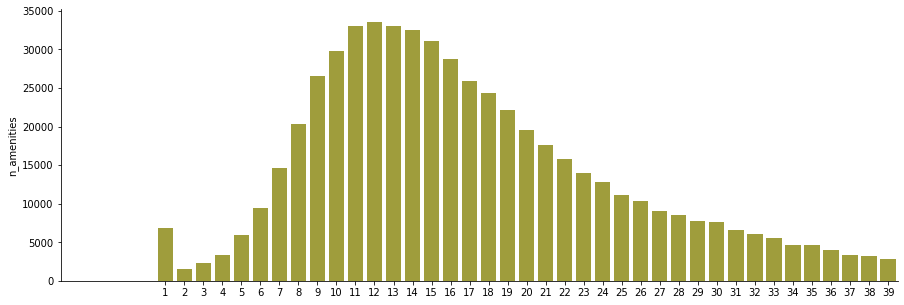

In [48]:
diagrama_caixa(base['n_amenities'])
grafico_barra(base['n_amenities'])

Então, essa virou uma coluna de valor numérico e, como todas as outras colunas de valores numéricos, eu exclui outliers com os mesmos modelos anteriores

In [49]:
base, linhas_removidas = excluir_outliers(base, 'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))

24343 linhas removidas


# Visualização de Mapa das Propriedades

Vamos criar um mapa que exibe um pedaço da nossa base de dados aleatório (50.000 propriedades) para ver como as propriedades estão distribuídas pela cidade e também identificar os locais de maior preço

In [50]:
amostra = base.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

 - Imagem Ilustrativa para subir no github o exemplo do mapa.

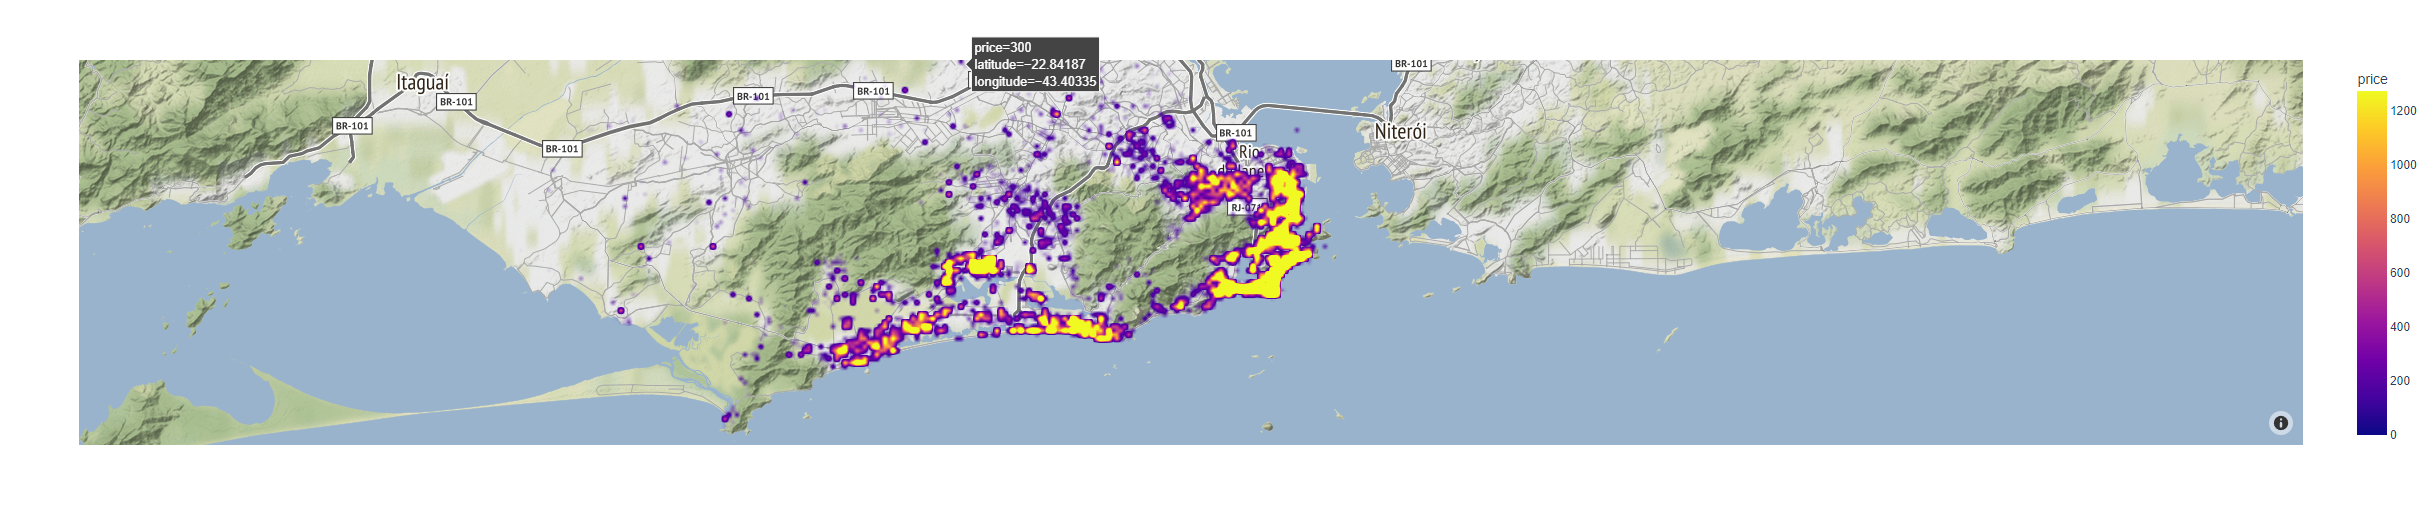

# Encoding

Precisamor Ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)

- Features de Valores True ou False, vamos substituir True por 1 e False por 0.
- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

In [51]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_cod = base.copy()
for coluna in colunas_tf:
    base_cod.loc[base_cod[coluna]=='t', coluna] = 1
    base_cod.loc[base_cod[coluna]=='f', coluna] = 0

In [52]:
colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_cod = pd.get_dummies(data=base_cod, columns=colunas_categorias)
display(base_cod.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
0,1,2.0,-22.96592,-43.17896,5,1.0,2.0,2.0,329.0,62.0,...,1,0,0,0,0,1,0,0,0,1
1,0,3.0,-22.97712,-43.19045,3,1.0,1.0,2.0,158.0,45.0,...,1,0,0,0,0,1,0,0,0,1
2,1,1.0,-22.98302,-43.21427,3,1.0,1.0,2.0,270.0,42.0,...,1,0,0,0,0,1,0,0,0,1
3,1,1.0,-22.98816,-43.19359,3,1.5,1.0,2.0,374.0,62.0,...,1,0,0,0,0,1,0,0,0,1
16,0,2.0,-22.92873,-43.17473,4,2.0,3.0,4.0,258.0,0.0,...,1,0,0,0,0,1,0,0,0,1


# Modelo de Previsão

- Métricas de Avaliação

Vamos usar aqui o R² que vai nos dizer o quão bem o nosso modelo consegue explicar o preço. Isso seria um ótimo parâmetro para ver o quão bom é nosso modelo <br>
-> Quanto mais próximo de 100%, melhor

Vou calcular também o Erro Quadrático Médio, que vai mostrar para gente o quanto o nosso modelo está errando. <br>
-> Quanto menor for o erro, melhor

In [53]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

- Escolhendo dos Modelos a Serem Testados
    1. RandomForest
    2. LinearRegression
    3. Extra Tree
    
Esses são alguns dos modelos que existem para fazer previsão de valores numéricos (o que chamamos de regressão). Estamos querendo calcular o preço, portanto, queremos prever um valor numérico.

Assim, escolhemos esses 3 modelos. Existem dezenas, ou até centenas de modelos diferentes. Mas na dúvida, esses 3 modelos que usamos aqui são bons para muitos problemas de Regressão.

In [54]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }

y = base_cod['price']
X = base_cod.drop('price', axis=1)

- Separa os dados em treino e teste + Treino do Modelo

Essa etapa é crucial. As Inteligências Artificiais aprendendo com o que chamamos de treino.

Basicamente o que a gente faz é: a gente separar as informações em treino e teste, ex: 10% da base de dados vai servir para teste e 90% para treino (normalmente treino é maior mesmo)

Aí, damos para o modelo os dados de treino, ele vai olhar aqueles dados e aprender a prever os preços.

Depois que ele aprende, você faz um teste com ele, com os dados de teste, para ver se ela está bom ou não. Analisando os dados de teste você descobre o melhor modelo

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:97.21%
RSME:44.00
Modelo LinearRegression:
R²:32.69%
RSME:216.30
Modelo ExtraTrees:
R²:97.51%
RSME:41.62


### Análise do Melhor Modelo

Modelo Escolhido como Melhor Modelo: ExtraTressRegressor

Esse foi o modelo com maior valor de R² e ao mesmo tempo o menor valor de RSME. Como não tivemos uma grande diferença de velocidade de treino e de previsão desse modelo com o modelo de RandomForest (que teve resultados próximos de R² e RSME), vamos escolher o Modelo ExtraTrees.

O modelo de regressão linear não obteve um resultado satisfatório, com valores de R² e RSME muito piores do que os outros 2 modelos.

Resultados das Métricas de Avaliaçõ no Modelo Vencedor:
Modelo ExtraTrees:

R²: 97.49%

RSME: 41.99

### Ajustes e Melhorias no Melhor Modelo

,0
bedrooms,0.115075
latitude,0.104497
longitude,0.101399
n_amenities,0.088943
extra_people,0.087092
accommodates,0.072222
bathrooms,0.071371
minimum_nights,0.065303
room_type_Entire home/apt,0.064147
beds,0.052544


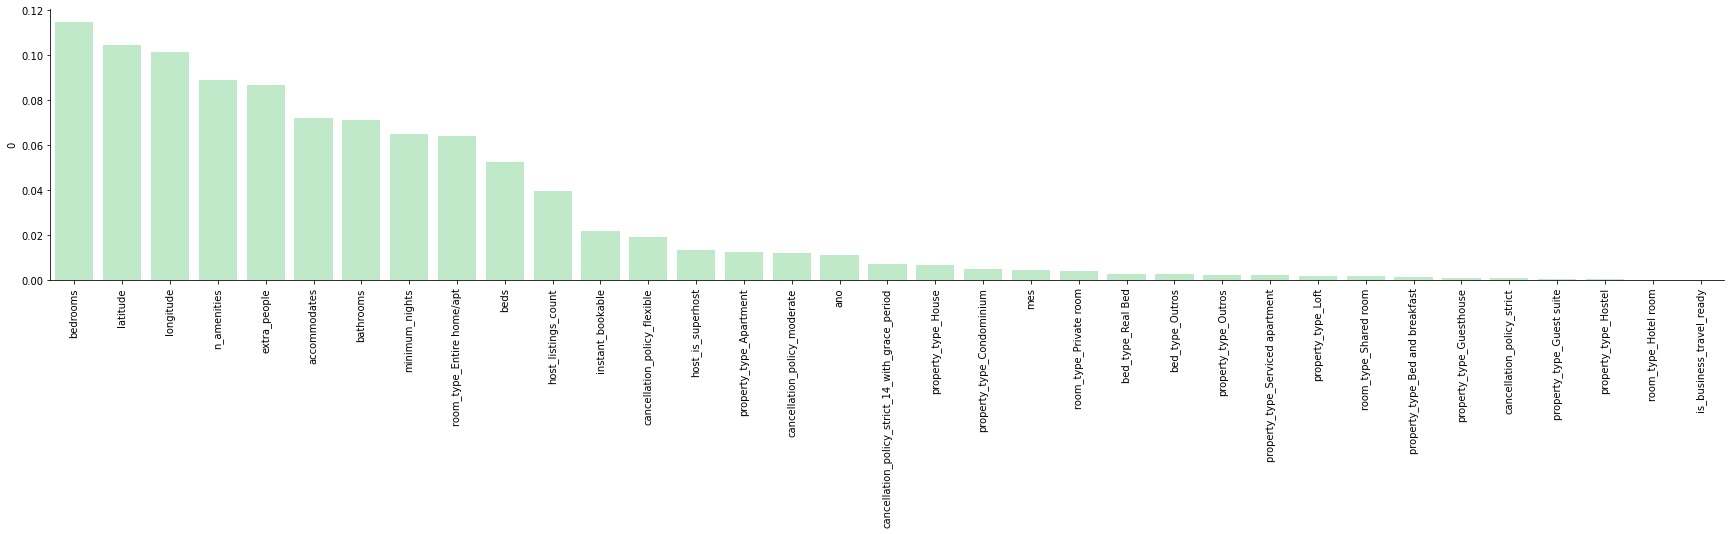

In [56]:
#print(modelo_et.feature_importances_)
#print(X_train.columns)
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(30, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0],color = cor_verde_claro)
ax.tick_params(axis='x', rotation=90)
sns.despine()

### Ajustes Finais no Modelo

- `is_business_travel` ready não parece ter muito impacto no nosso modelo. Por isso, para chegar em um modelo mais simples, vamos excluir essa feature e testar o modelo sem ela.

In [57]:
base_cod = base_cod.drop('is_business_travel_ready', axis=1)

y = base_cod['price']
X = base_cod.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Modelo ExtraTrees:
R²:97.51%
RSME:41.64


In [58]:
base_teste = base_cod.copy()
for coluna in base_teste:
    if 'bed_type' in coluna:    
        base_teste = base_teste.drop(coluna, axis=1)
print(base_teste.columns)
y = base_teste['price']
X = base_teste.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')
Modelo ExtraTrees:
R²:97.50%
RSME:41.65


In [59]:
print(previsao)

[125.36 265.54 165.37 ... 300.59 145.97 158.  ]


# Deploy
- Agora iremos criar as bases para o deploy e em um novo notebook criaremos o código do deploy usando o modelo.

In [60]:
X['price'] = y
X.to_csv('dados_rio.csv')

In [62]:
joblib.dump(modelo_et,'modelo.joblib')

['modelo.joblib']